# Assignment: Unsupervised Machine Learning \ Clustering

In this assignment you will continue the experience you've done with clustering - this time, via hierarchical clustering and DBSCAN.

## Part 1: Hierarchical Clustering
(Practice material by Etam Benger)

In this part we are going to experiment with Hierarchical Clustering, a very powerfull clustering technique that can easily be interperted and explained via the dendrgoram.

The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

### Different ways to calculate the distance between clusters can yield strikingly different results

In [1]:
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Labels
l = ['A', 'B', 'C', 'D', 'E', 'F']

# Distance matrix
# (Note that it must be symmetrical and its diagonal is always 0)
d = np.array([[0, 1, 3, 3, 3, 4],
              [1, 0, 4, 2, 3, 2],
              [3, 4, 0, 3, 2, 5],
              [3, 2, 3, 0, 2, 4],
              [3, 3, 2, 2, 0, 5],
              [4, 2, 5, 4, 5, 0]])

In [3]:
# The hierarchy.linkage function uses a condensed distance matrix,
# which is a flattened vector of the upper right triangle of the matrix:
# (Caution! If you use the distance matrix as is, you will get erroneous
# results -- in that case the algorithm will assume that each row is a
# vector that represents the respective point, and will calculate the
# euclidean distance between those vectors, which is absolute nonsense.)
squareform(d)

array([1, 3, 3, 3, 4, 4, 2, 3, 2, 3, 2, 5, 2, 4, 5])

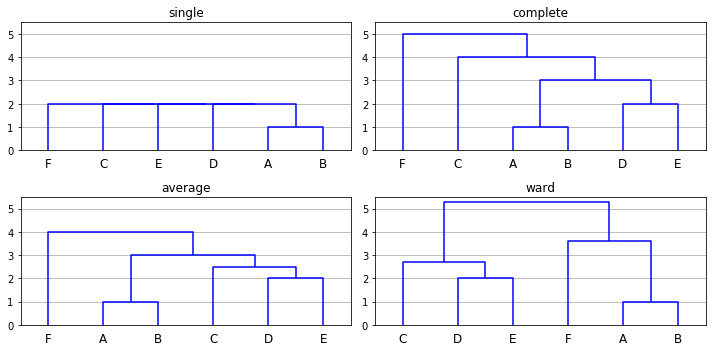

In [4]:
# Please read the documentation here:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#
# As you'll see below, the different methods of linkage may produce very different structures
# and, consequently, very different clusters. Try to understand why (look at the distance matrix
# and follow the formulas in the documentation).
# Sometimes the characteristics of the problem suggest what method is more natural to use than
# the others. This is especially true with respect to the complete (= farthest point) and single
# (= nearest point) methods. Other times the 'correct' method to use is not obvious at all, and
# it requires inspecting the results and the data thoroughly. The average method usually works
# well, however.

methods = ['single', 'complete', 'average', 'ward']  # There are other methods as well, see documentation

plt.figure(figsize=(10, 5))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    plt.title(method)
    
    ############# This is the relevant part: #############
    #                                                    #
    lnk = hierarchy.linkage(squareform(d), method)
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)
    #                                                    #
    ######################################################
    
    plt.ylim(0, 5.5)
    plt.grid(axis='y')

plt.tight_layout()

### Altering the order in which clusters are joined can also yield strikingly different results

In [5]:
# Labels
l = ['A', 'B', 'C', 'D', 'E']

# Distance matrices
epsilon = 10**-16
a, b = 1 + epsilon, 1 - epsilon

d1 = np.array([[0, 1, a, 5, 5],
               [1, 0, 3, 5, 5],
               [a, 3, 0, 3, b],
               [5, 5, 3, 0, 1],
               [5, 5, b, 1, 0]])

d2 = np.array([[0, 1, b, 5, 5],
               [1, 0, 3, 5, 5],
               [b, 3, 0, 3, a],
               [5, 5, 3, 0, 1],
               [5, 5, a, 1, 0]])

In [6]:
# The Frobenius distance between the matrices is negligible
np.sqrt(np.sum((d1-d2)**2))

2.220446049250313e-16

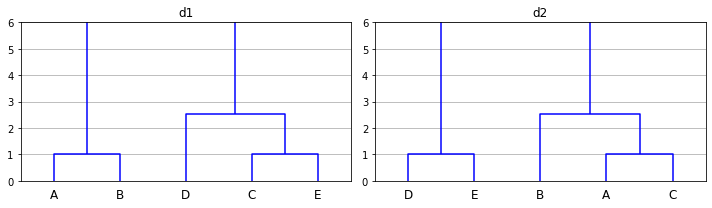

In [10]:
# But the resulting clusters are very different!

plt.figure(figsize=(10, 3))

for i, d in enumerate([d1, d2]):
    plt.subplot(1, 2, i+1)
    plt.title('d%s' % (i+1,))

    lnk = hierarchy.linkage(squareform(d), 'ward') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)

    plt.ylim(0, 6)
    plt.grid(axis='y')

plt.tight_layout()

## Challenge 1.1
Data preparation and preprocessing can help in reducing such "hypersensitivity". One of the techniques is to clean the distance matrix from noise before the actual clustering. This can be done by... clustering. Your mission, should you choose to accept it, is to:
1. Apply the K-Means algorithm to clean the distance matrix, assuming the correct number of clusters is 4. (Clustering can be made on each matrix independently, although in some cases it's wiser to do a cross-matrix clustering).
2. Create new cleaned versions of the distance matrices (d1_clean and d2_clean)
3. Repeat the above process 


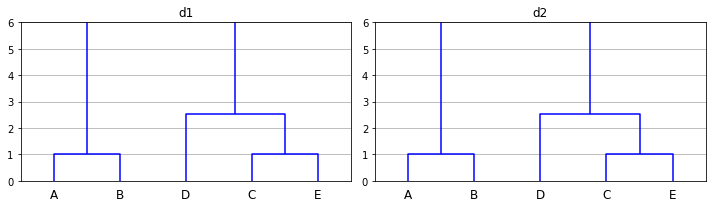

In [60]:
from sklearn.cluster import KMeans

def clean(mat):
    dims = mat.shape[0]
    flat = mat.reshape(-1,1)
    kmeans = KMeans(n_clusters=4, random_state=0).fit(flat)
    pred = kmeans.predict(flat)
    clean = np.take(kmeans.cluster_centers_, pred).reshape(dims,-1)
    return clean

d1_clean = clean(d1)
d2_clean = clean(d2)

plt.figure(figsize=(10, 3))

for i, d in enumerate([d1_clean, d2_clean]):
    plt.subplot(1, 2, i+1)
    plt.title('d%s' % (i+1,))

    lnk = hierarchy.linkage(squareform(d), 'ward') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)

    plt.ylim(0, 6)
    plt.grid(axis='y')

plt.tight_layout()


### Analyzing voting data

We can also use hierarchical clustering to analyzie election voting data, as we will see in the following exercise

In [61]:
df = pd.read_csv('Elections.csv')

# Show first 10 rows
df[:10]

,TownNumber,TownName,Potential,TotalVotes,PercentVote,Qualified,Disqualified,Avoda,Or,BaitYehudi,...,Brit,Gever,Zomet,Zabar,Daam,AleYarok,Koah.2,Lidar,Yarok,Shas
0,5000,תל אביב - יפו,383990,226390,58.96,224000,2390,34095,77,3417,...,36,41,42,273,198,1003,50,41,1081,14412
1,3000,ירושלים,353784,217905,61.59,215743,2162,12355,38,8944,...,26,19,23,147,64,434,26,39,445,32624
2,4000,חיפה,235198,136506,58.04,134710,1796,17279,43,3431,...,13,29,67,218,89,485,41,37,467,4117
3,8300,ראשון לציון,182953,117147,64.03,115839,1308,12647,25,2451,...,22,22,24,238,63,454,30,30,580,6784
4,7900,פתח תקווה,155678,100123,64.31,98905,1218,8661,20,6043,...,19,16,21,90,45,330,41,32,341,8061
5,70,אשדוד,156977,96363,61.39,94776,1587,4176,23,1399,...,14,31,26,139,93,294,27,103,212,14065
6,6600,חולון,149023,88202,59.19,86962,1240,9439,22,1409,...,21,24,20,129,55,326,25,24,344,9250
7,7400,נתניה,150183,82783,55.12,81367,1416,5928,33,3462,...,22,35,43,113,68,285,23,45,302,8837
8,9000,באר שבע,148214,79215,53.45,77853,1362,5577,19,1608,...,17,29,16,109,69,227,27,41,189,8491
9,8600,רמת גן,119271,75684,63.46,74932,752,11023,32,2185,...,11,22,21,95,27,293,18,17,452,3709


In [63]:
# Number of cities to cluster (they are ordered by the total number of votes, descending)
n = 100

# Data matrix and labels list (41 columns - metadata ones)
x = np.zeros((n, 34))
labels_r = []

# Iterate over rows in dataframe
for i, row in df[:n].iterrows():
    x[i] = row[7:]                         # take only the votes, not the other meta-data
    labels_r.append(df.TownName[i][::-1])  # reverse the labels (because they are in Hebrew)

# Normalize rows (so they represent proportions):
x = x/(np.sum(x, axis=1).reshape(-1, 1))

In [70]:
# You can experiment with the different methods ('single', 'complete', 'average', 'ward'):
# (Note that we don't use squareform here, so the linkage function will assume by
# default that x is not a distance matrix but a set of observations, and will calculate
# the euclidean distance between them. We could, instead, calculate our own distance
# matrix using other distance measures between distributions, for example the Kullback-
# Leibler divergence (relative entropy).)
lnk = hierarchy.linkage(x, 'average')

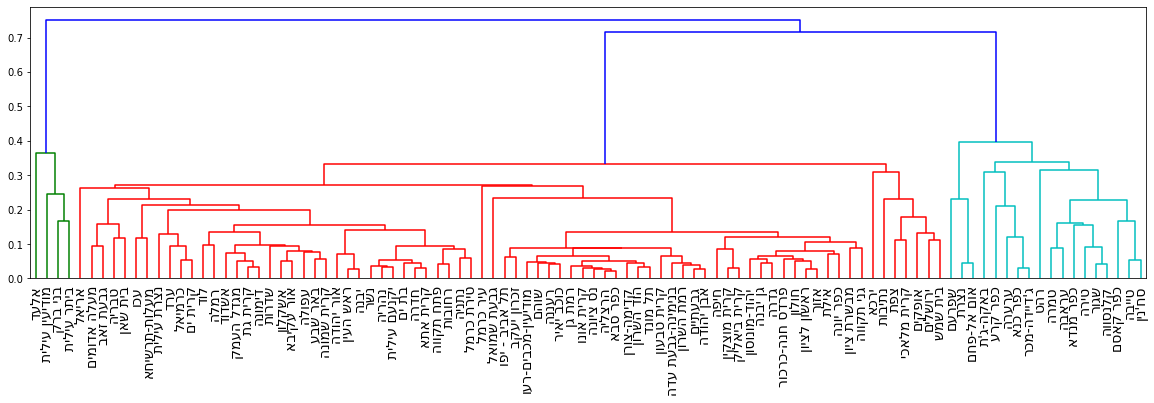

In [71]:
plt.figure(figsize=(20, 5))

# You can experiment with the color threshold to observe the different possible clusterizations:
hierarchy.dendrogram(lnk, labels=labels_r, leaf_font_size=14, color_threshold=0.5);

## Challenge 1.2
When using our domain expertise regarding the population in Israeli cities and villages, we can cleary conclude from the results that our society is mainly splitted according to their "religiosity". Although the jingle says "there's no more right or left", your mission, should you choose to accept it, is to find a way to distinguish between right and left.

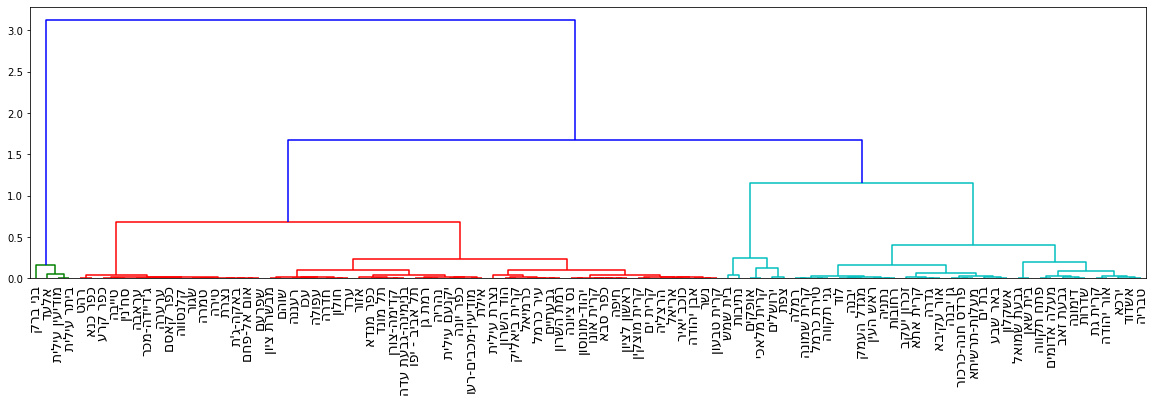

In [202]:
# Number of cities to cluster (they are ordered by the total number of votes, descending)
from sklearn.preprocessing import normalize

clusters = 2
x = np.zeros((n, clusters + 1))
labels_r = []
df_copy = df.copy()

by_party = df_copy.iloc[:30,7:].values.T

normed = normalize(by_party, axis=1, norm='l1')

kmeans = KMeans(n_clusters=clusters, random_state=0).fit(normed)

#cluster the parties into k = 2 clusters
aff = kmeans.predict(normed)

# aggregate votes for each cluster
for i, row in df[:n].iterrows():
    for k,j in enumerate(aff):
        x[i,j] += row[7:][k]
    # adding voting percents
    x[i, -1] = row[4]
    labels_r.append(df.TownName[i][::-1])  # reverse the labels (because they are in Hebrew)

x = x/(np.sum(x, axis=1).reshape(-1, 1))
lnk = hierarchy.linkage(x, 'ward')
plt.figure(figsize=(20, 5))


hierarchy.dendrogram(lnk, labels=labels_r, leaf_font_size=14, color_threshold=1.5);


## Part 2 - DBSCAN

Original code was taken from those sources:

https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea

In this part of the exercise, we will experiment with the DBSCAN algorithm on a synthetic set of data

In [203]:
# auxilary plotting functions
def plot(X):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.show()
    
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import preprocessing

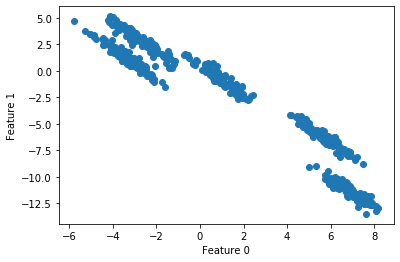

In [204]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=500, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

plot(X)

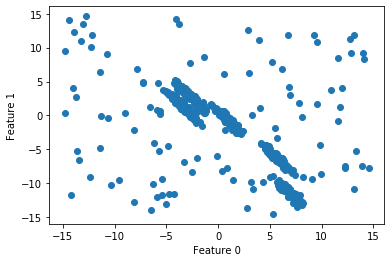

In [205]:
# Adding Noise to data
outliers = 30 * (np.random.RandomState(42).rand(100, 2) ) - 15.0
X = np.concatenate([X, outliers])
y = np.concatenate([y, [-1]*len(outliers)])
plot(X)

### K-Means attempt
Lets see how those outliers and non-spherical shapes affects K-Means clustreing

Text(0, 0.5, 'Feature 1')

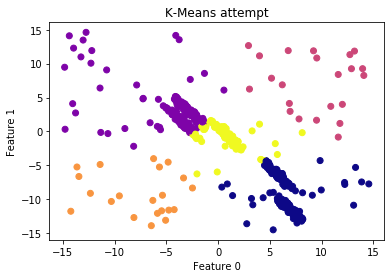

In [206]:
# cluster the data into five clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
kmeans_clusters = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=kmeans_clusters, cmap="plasma")
plt.title("K-Means attempt")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Not surprisingly, K-Means failed to cluster properly the data above 

As we saw in the lecture, DBSCAN can overcome those issues. Yet we still need to determine the parametrs...




# Estimateing $\varepsilon$

## Challenge 2.1

Your co-worker suggested a way to select $\epsilon$ of dbscan.
He wants to go over different eps values and find the one that maximizes the silhouette value.
Implement the algorithm and find the best $\epsilon$ using this method.
1. Create an array of possible $\epsilon$ values.
2. Iterate over the different values and find the best $\epsilon$ value. What is it?
3. Visualize the results of the best one.



0.9702447645091686 1.615560701472904
eps: 2.0950000000000006 max_ss: 0.5457627109246378
iterated over 1231


Text(0, 0.5, 'Feature 1')

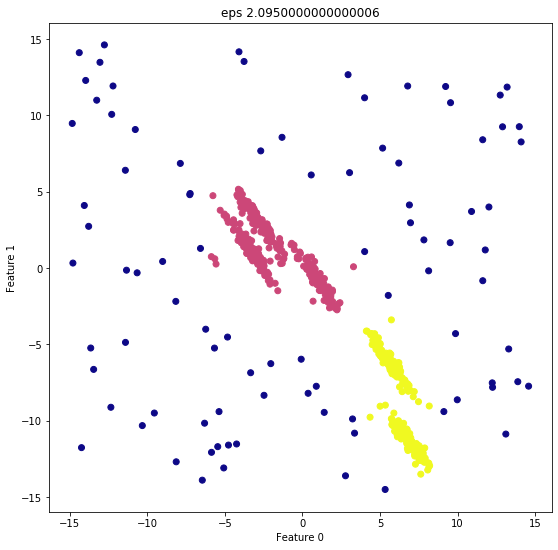

In [354]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import operator
minPts = 50 

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)[:,1]
# plt.plot(distances)
derivative = np.gradient(distances)
rate_of_change = (np.roll(derivative,1) - derivative)
rate_of_change[0] = 0
distances[np.argmax(rate_of_change) - 1]
print(np.percentile(distances,88), np.percentile(distances,95))
plt.figure(figsize=(9, 9))
d = {}
for i, eps in enumerate(np.arange(0.97, 2.2, 0.001)):
    clustering = DBSCAN(eps=eps, min_samples=minPts).fit_predict(X)
    d[eps] = silhouette_score(X, clustering)

eps, max_ss = max(d.items(), key=operator.itemgetter(1))
print('eps:',eps,'max_ss:', max_ss)
print('iterated over', len(d.items()))
clustering = DBSCAN(eps=eps, min_samples=minPts).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clustering, cmap="plasma")
plt.title("eps " + str(eps))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

How many values of $\epsilon$ did you iterate? can you find a way to narrow down the range of the search?

## Challenge 2.2


Support yout findings by plotting the _k-dist_ graph of the data with the given $minPts$, and repeat the above process with a more precise range of $\epsilon$.

Did you manage to find a better $\epsilon$?

visualize the new results.

24
0.4495582094276519
0.9702447645091686 1.615560701472904


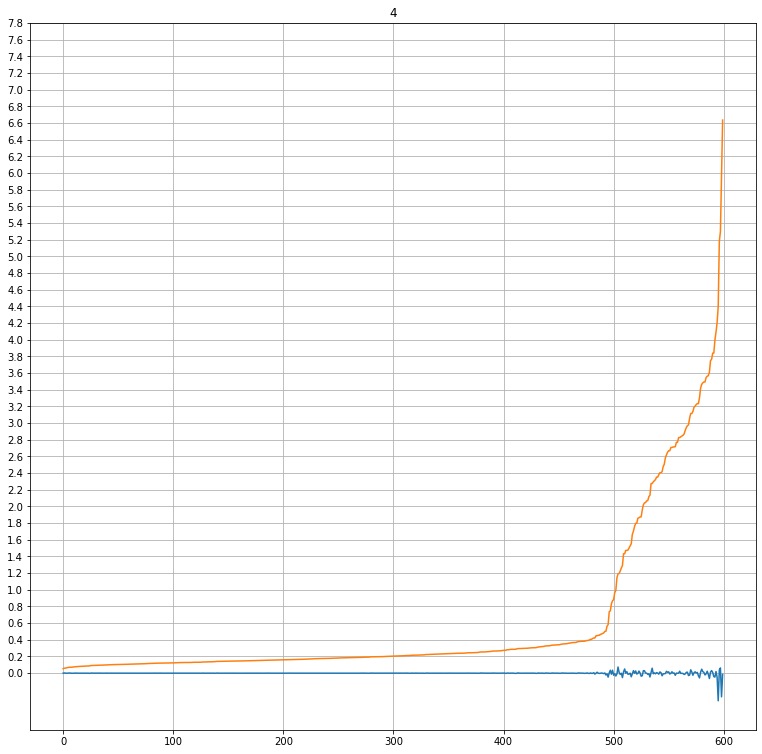

In [424]:
def plotKDist(data, numNeighbours):
    plt.figure(figsize=(13, 13))
    nbrs = NearestNeighbors(n_neighbors=numNeighbours).fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = distances[:,-1]
    distances = np.sort(distances, axis=0)
    derivative = np.gradient(distances)
    rate_of_change = (np.roll(derivative,1) - derivative)
    rate_of_change[0] = 0
    print(distances[np.argmax(rate_of_change[:-110])])
    plt.plot(rate_of_change)
    plt.plot(distances)
    minor_ticks = np.arange(0, 8, 0.2)
#     plt.set_yticks(minor_ticks)
    plt.title(numNeighbours)
    plt.yticks(minor_ticks)
    plt.grid()

print(minPts)
plotKDist(X, int(np.sqrt(minPts)))
print(np.percentile(distances,88), np.percentile(distances,95))

23
eps: 0.6882499999999991 max_ss: 0.33017400081579307
iterated over 200


Text(0, 0.5, 'Feature 1')

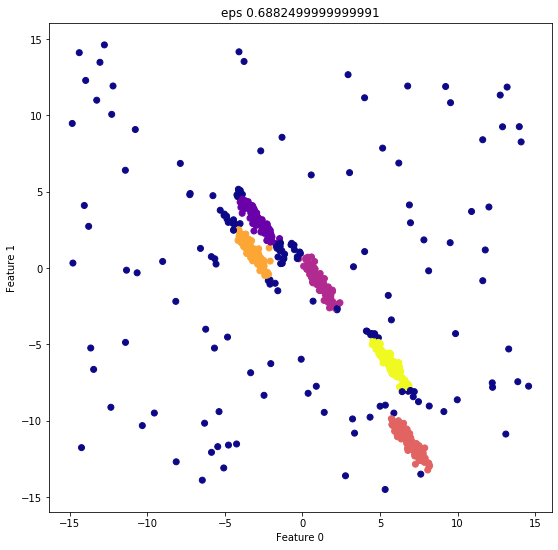

In [451]:
minPts=int(np.sqrt(len(X)))  - 1
print(minPts)
plt.figure(figsize=(9, 9))
d = {}
for i, eps in enumerate(np.arange(0.68, 0.69, 0.00005)):
    clustering = DBSCAN(eps=eps, min_samples=minPts).fit_predict(X)
    d[eps] = silhouette_score(X, clustering)

eps, max_ss = max(d.items(), key=operator.itemgetter(1))
print('eps:',eps,'max_ss:', max_ss)
print('iterated over', len(d.items()))
clustering = DBSCAN(eps=eps, min_samples=minPts).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clustering, cmap="plasma")
plt.title("eps " + str(eps))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")




# Good Luck and Enjoy Learning Machine Learning!

